# Logistic Regression with Scikit- Learn

## 1.1 What is the problem?
>"Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision." 

<br />
- From "Programming Exercise 2: Logistic Regression" 

In [1]:
#important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

## 1.2 Visualize the data

In [2]:
df= pd.read_csv('ex2data1.txt',header=None) # Because in the text file there is no column name
df.columns=["Exam_1_score","Exam_2_score", "Result"] # set column name
df.head(5)   #show data (only 5. Just to see data type)

,Exam_1_score,Exam_2_score,Result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


* **Plot data** <br />
First we have to make two different lists for positive and negative result. 

In [3]:
admitted= df.loc[df['Result'] == 1] 
not_admitted= df.loc[df['Result'] == 0] 

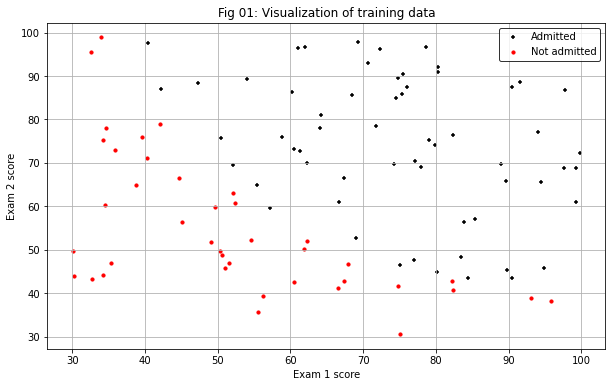

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(admitted['Exam_1_score'],admitted['Exam_2_score'],label='Admitted',color='k', marker='+',s=20)
plt.scatter(not_admitted['Exam_1_score'],not_admitted['Exam_2_score'],label='Not admitted',color='r', marker='o',s=10)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Fig 01: Visualization of training data')
plt.legend(edgecolor='black')
plt.grid(True)

## 1.3 Train your data with Logistic Regression

In [5]:
log_reg = LogisticRegression()
log_reg.fit(df[['Exam_1_score','Exam_2_score']],df["Result"])

LogisticRegression()

* **Train-test Split** <br />
Generally, it is a standard practice to use your data for training the model and testing it. We should not use same data for traing and testing both. But here given data is too small in number. So, we do not have any other option. <br />

* **Prediction**

In [6]:
predicted_data=log_reg.predict(df[['Exam_1_score','Exam_2_score']])

**Given prediction:** If Exam 1 score is 45 and Exam 2 score is 85, the probability of admission should be 0.776.

In [7]:
result=log_reg.predict_proba([[45,85]])
print(result)

[[0.2247144 0.7752856]]


First part of array says that probability of rejection (result 0) is 0.2247 and probability of admission (result 1) is 0.7753. 

## 1.4 Decision Boundary
First just make a meshgrid. See fig 01. You can notice that score of Exam 1 and 2 is in range 30 and 100. For making a gridspace. it is enough. But you can vary a little if you want.

In [8]:
u = np.linspace(25, 105,1000)
v = np.linspace(25, 105, 1000)
xx,yy=np.meshgrid(u,v)  

In [9]:
z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

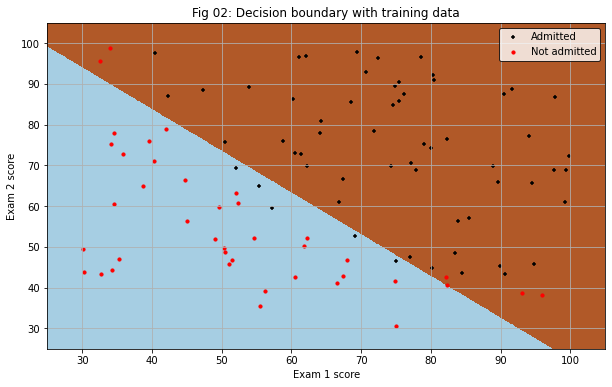

In [10]:
plt.figure(1, figsize=(10, 6))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, z)
plt.scatter(admitted['Exam_1_score'],admitted['Exam_2_score'],label='Admitted',color='k', marker='+',s=20)
plt.scatter(not_admitted['Exam_1_score'],not_admitted['Exam_2_score'],label='Not admitted',color='r', marker='o',s=10)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Fig 02: Decision boundary with training data')
plt.legend(edgecolor='black')
plt.grid(True)

## 2.1 What is the problem?
>"Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model." 

<br />
From "Programming Exercise 2: Logistic Regression" . <br />
Let's load data.

## 2.2 Visualize the data

In [11]:
df_2= pd.read_csv('ex2data2.txt',header=None) # Because in the text file there is no column name
df_2.columns=["test_1","test_2", "Result"] # set column name
df_2.head(5)   #show data (only 5. Just to see data type)

,test_1,test_2,Result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


* **Plot data** <br />
First we have to make two different lists for positive and negative result. 

In [12]:
accepted= df_2.loc[df_2['Result'] == 1] 
rejected= df_2.loc[df_2['Result'] == 0] 

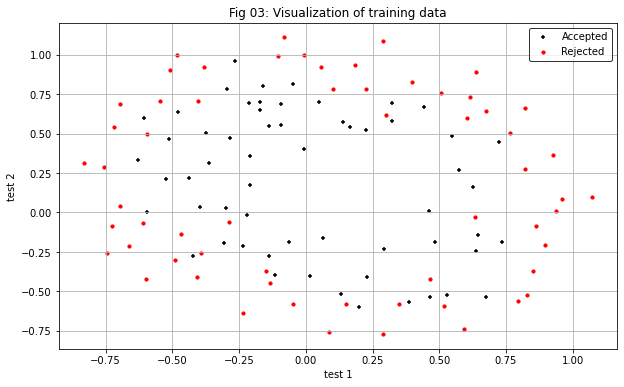

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(accepted['test_1'],accepted['test_2'],label='Accepted',color='k', marker='+',s=20)
plt.scatter(rejected['test_1'],rejected['test_2'],label='Rejected',color='r', marker='o',s=10)
plt.xlabel('test 1')
plt.ylabel('test 2')
plt.title('Fig 03: Visualization of training data')
plt.legend(edgecolor='black')
plt.grid(True)

## 2.3 Data preparation
Feature mappinfg is one of important part of data preparation. 
>"One way to fit the data better is to create more features from each data point. ...we will map the features into all polynomial terms of x1 and x2 up to the sixth power."

<br />
From "Programming Exercise 2: Logistic Regression" . <br />

In [14]:
degree=6
poly = PolynomialFeatures(degree)

In [15]:
data=poly.fit_transform(df_2[['test_1','test_2']])

## 2.4 Train your data with Logistic Regression

In [16]:
log_reg = LogisticRegression(C=1.5) # here C is regularization strength
log_reg.fit(data,df_2["Result"])

LogisticRegression(C=1.5)

In [17]:
result=log_reg.predict(data)

## 2.5 Decision Boundary

In [18]:
#making of a meshgrid
u = np.linspace(-1.0, 1.2,1000)
v = np.linspace(-1.0, 1.2,1000)
xx,yy=np.meshgrid(u, v)

In [19]:
points=np.c_[xx.ravel(), yy.ravel()]
data_with_feature=poly.fit_transform(points)
ans=log_reg.predict(data_with_feature)
ans = ans.reshape(xx.shape) #we have to reshape because otherwise we can't plot

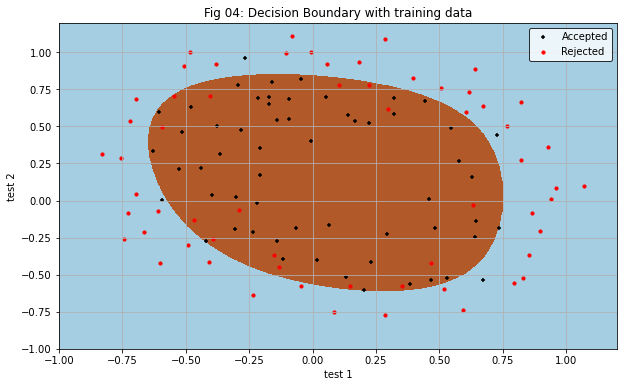

In [20]:
plt.figure(1, figsize=(10, 6))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, ans)
plt.scatter(accepted['test_1'],accepted['test_2'],label='Accepted',color='k', marker='+',s=20)
plt.scatter(rejected['test_1'],rejected['test_2'],label='Rejected',color='r', marker='o',s=10)
plt.xlabel('test 1')
plt.ylabel('test 2')
plt.title('Fig 04: Decision Boundary with training data')
plt.legend(edgecolor='black')
plt.grid(True)

Now second assignment is also done. This was really beautiful. <br />
<font size="5"> Enjoy!! </font>